In [1]:
## Bank Credit Data Visualization for Classification
 # Need to separate label categories using disinctive features for each label category, which results in low error rate
    
# Load packages required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
# Load dataset & assigns human-readable names to columns. Shape & head of data frame are then printed.

credit = pd.read_csv('German_Credit.csv', header = None)
credit.columns = ['customer_id', 'checking_account_status', 'loan_duration_mo', 'credit_history',
                  'purpose', 'loan_amount', 'savings_account_balance', 'time_employed_yrs', 
                  'payment_pcnt_income', 'gender_status', 'other_signators', 'time_in_residence',
                  'property', 'age_yrs', 'other_credit_outstanding', 'home_ownership', 'number_loans',
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 'bad_credit']
print(credit.shape)
credit.head()

(1012, 22)


,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Customer_id is not a needed feature, so will remove

credit.drop(['customer_id'], axis = 1, inplace = True)
print(credit.shape)
credit.head()


(1012, 21)


,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# Using dictionaries to recode categorical features w/ human- readable text

code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]


for col_dic in code_list:     # iterates over columns & maps codes to human-readable category names
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head() 

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


In [5]:
# Testing for Class Imbalance by Examining Classes
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 # higher error rate for the minority class. This should be tested for before training any model.   

credit_counts =  credit['bad_credit'].value_counts()
print(credit_counts)

0    710
1    302
Name: bad_credit, dtype: int64


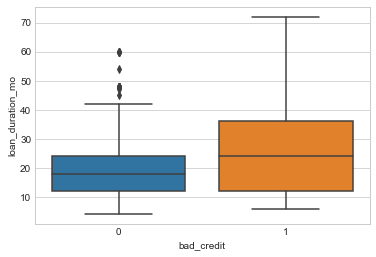

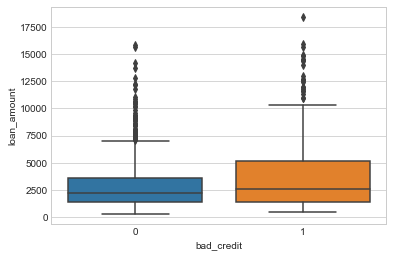

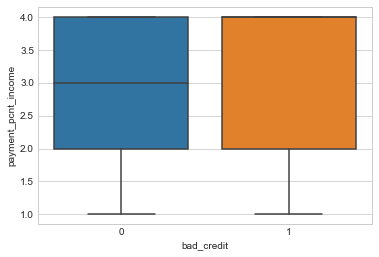

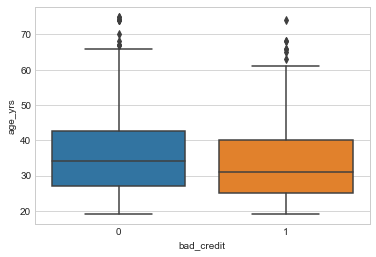

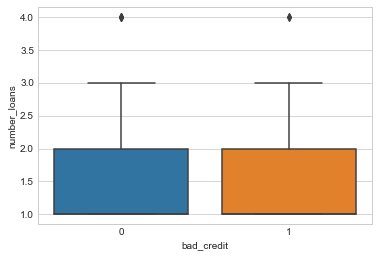

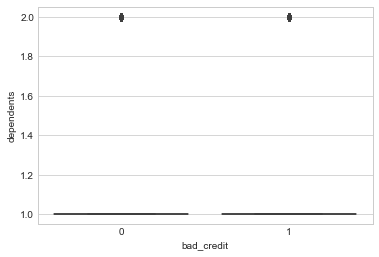

In [6]:
#Above-  Bad credit comprises 30% of the cases, which could bias the training of the model.
#Below- Visualize Class Separation by Numeric Features


def plot_box(credit, cols, col_x = 'bad_credit'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = credit)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 
            'age_yrs', 'number_loans', 'dependents']
plot_box(credit, num_cols)

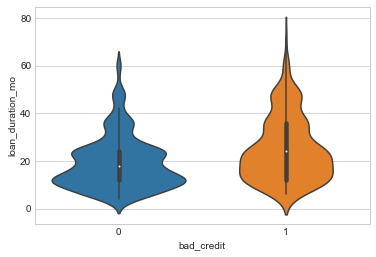

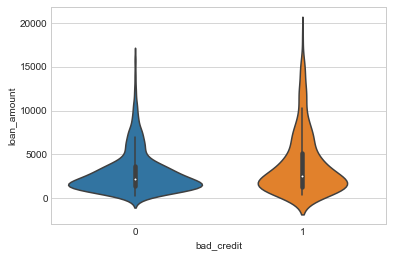

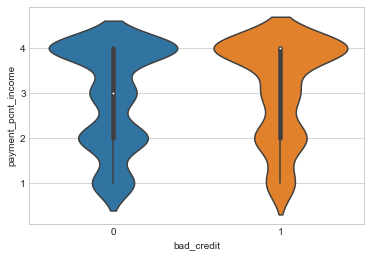

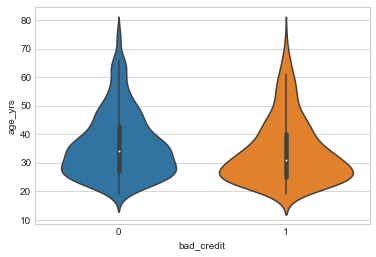

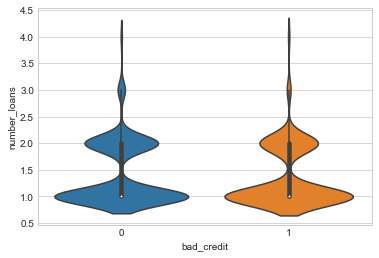

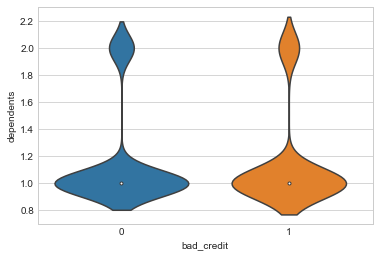

In [7]:
#Above- Separation b/w good & bad credit can be shown for loan_duration_mo, loan_amount, & payment_pcnt_income.
 # Customers with bad credit have longer loan terms for larger amounts & with a higher percentage rate.
 # Age_yrs, number_loans, & dependents do not show much separation, because last two plots don't have enough non-zero cases.

#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(credit, cols, col_x = 'bad_credit'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = credit)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(credit, num_cols)

checking_account_status


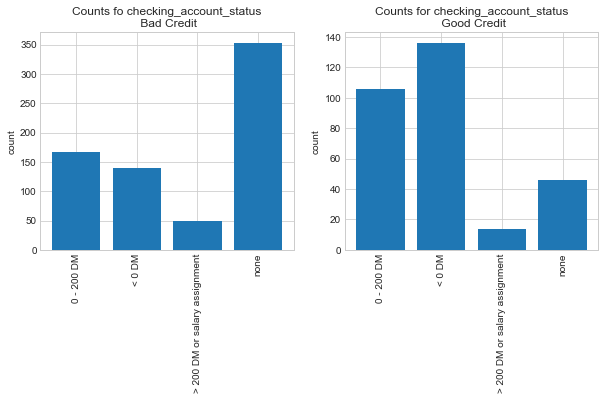

credit_history


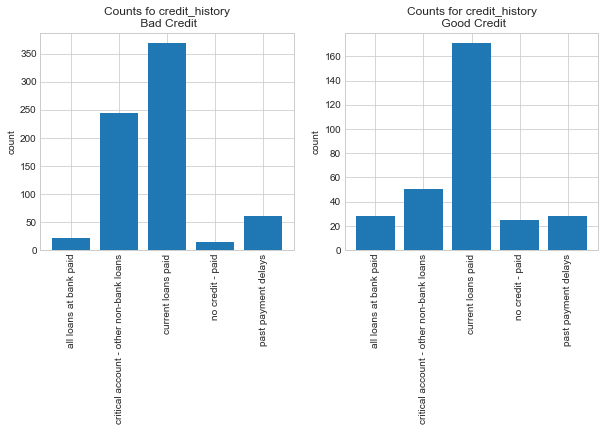

purpose


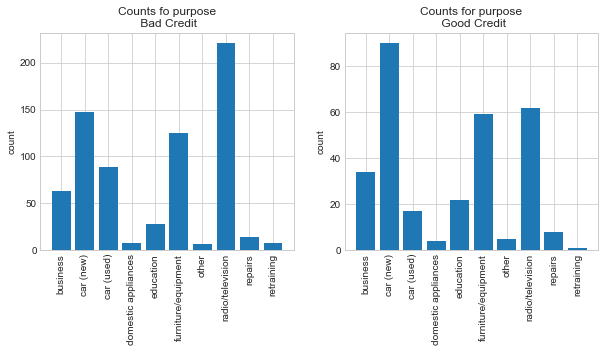

savings_account_balance


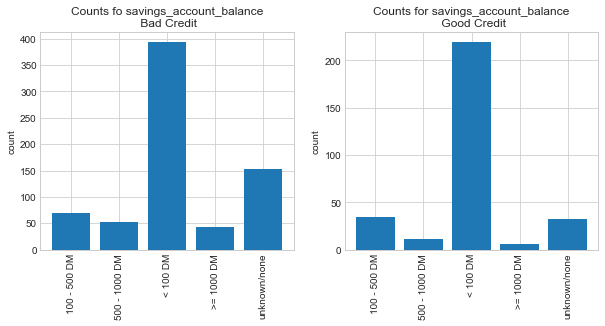

time_employed_yrs


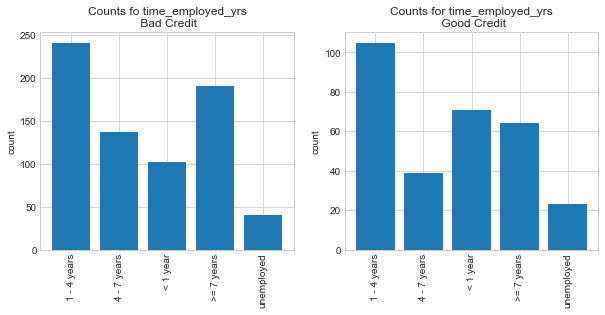

gender_status


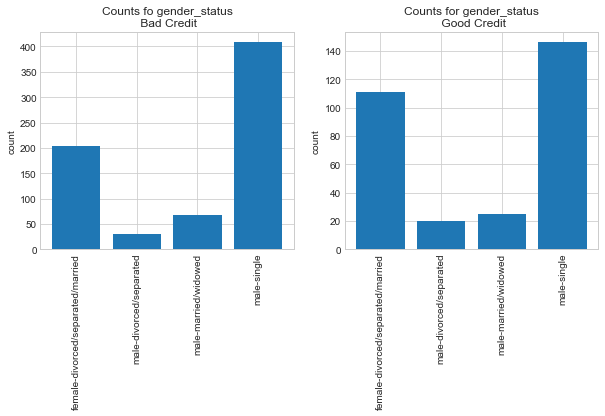

other_signators


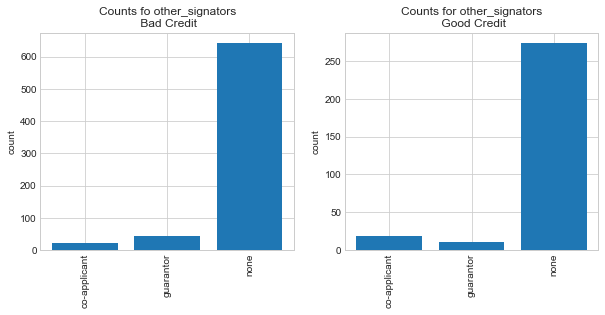

property


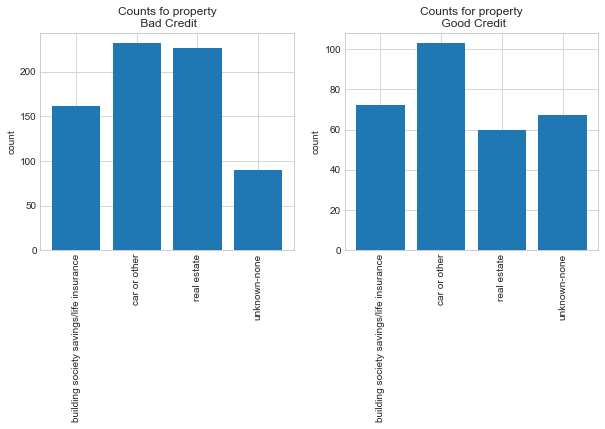

other_credit_outstanding


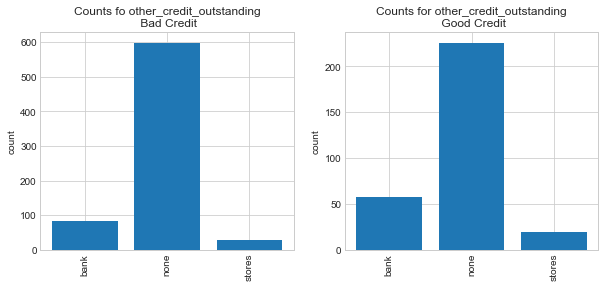

home_ownership


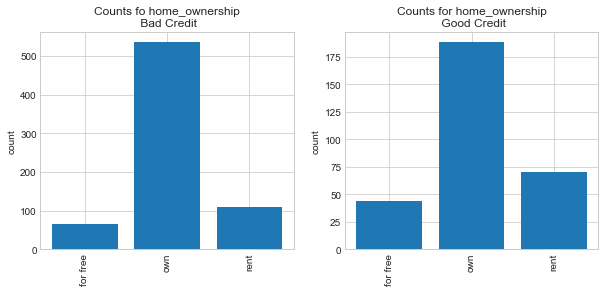

job_category


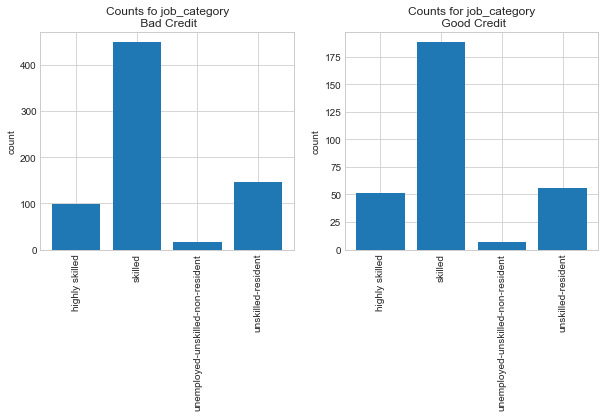

telephone


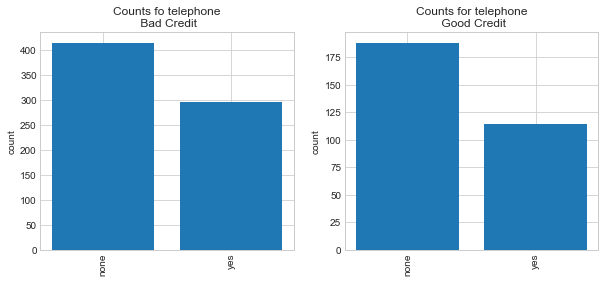

foreign_worker


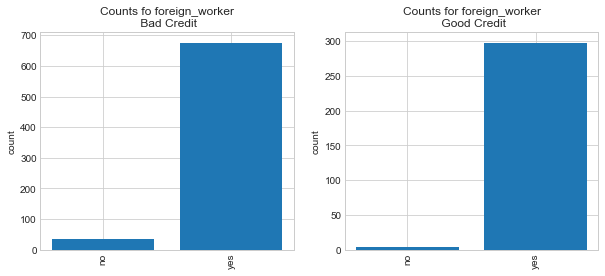

In [8]:
#Above- Loan_duration_mo & loan_amount only different for extreme values and might not be as useful.

#Below- Visualize Class Separation by Categorical Features

import numpy as np
cat_cols = ['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance',
            'time_employed_yrs', 'gender_status', 'other_signators', 'property',
            'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 'foreign_worker']

credit['dummy'] = np.ones(shape = credit.shape[0])
for col in cat_cols:
    print(col)
    counts = credit[['dummy', 'bad_credit', col]].groupby(['bad_credit', col], as_index = False).count()
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts fo ' + col + '\n Bad Credit')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Good Credit')
    plt.ylabel('count')
    plt.show()

In [9]:
#Above- Checking_account_status & credit_history have differing distributions for good vs. bad credit. Purpose, savings_account_balance, time_employed_yrs, gender_status, other_credit_outstanding, & telephone show small differences but might not be significant.
 #  Other_signators, home_ownership, job_category, & foreign_worker have a dominant category w/ few cases of other categories, not helpful for separating the label.
    
#Summary
 # 1) Checked for imbalance in the label using a frequency table.
 # 2) Explored numeric & categorical features via visualization to see which ones separated cases for the label.